In [2]:
import pytorch_lightning as pl
from glob import glob
import torch
import os
from models import CNN
from datasets.coil import Coil100Module
from models.pretrained import lenet_trained_on_coil_p1
from experiments.rejectron.rejectron import RejectronClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

os.chdir(f'/voyager/projects/tomginsberg/pqlearning')

In [3]:
model = lenet_trained_on_coil_p1()

trainer = pl.Trainer(gpus=[2])
dm = Coil100Module(split = 1)
res = trainer.validate(model, dm.val_dataloader(), verbose=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/voyager/projects/tomginsberg/.conda/envs/pqlearning/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:376: UserWarning: Your val_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  rank_zero_warn(
/voyager/projects/tomginsberg/.conda/envs/pqlearning/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Validating: 0it [00:00, ?it/s]

/voyager/projects/tomginsberg/.conda/envs/pqlearning/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val/accuracy': 0.9816666841506958,
 'val/loss': 0.0860605388879776,
 'val_epoch/accuracy': 0.9816666841506958}
--------------------------------------------------------------------------------


In [25]:
h = lenet_trained_on_coil_p1().cuda(device=2)
c = CNN.load_from_checkpoint('checkpoints/rejectron_coil/c_0/epoch=73-step=4217.ckpt').cuda(device=2)

In [36]:
l = []
p = []

for x, y in tqdm(dm.train_dataloader()):
    p.append(c(x.cuda(device=2)).cpu())
    l.append(y)
    
p = torch.cat(p)
l = torch.cat(l)

100%|█████████████████████████████████████████████| 8/8 [00:02<00:00,  3.18it/s]


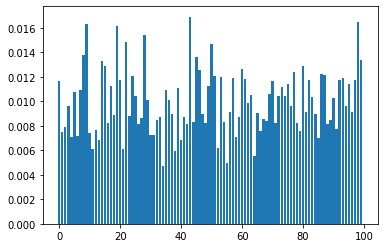

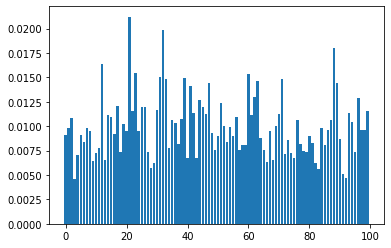

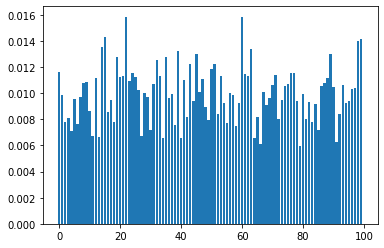

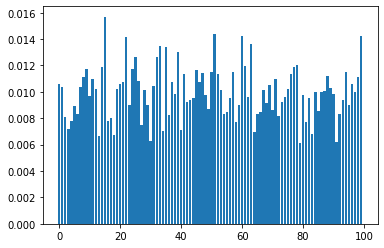

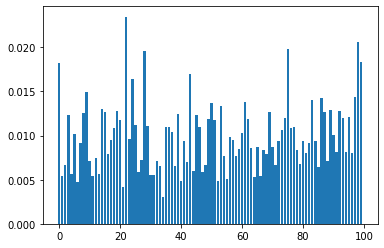

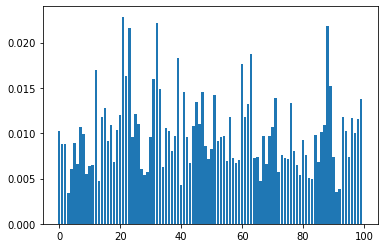

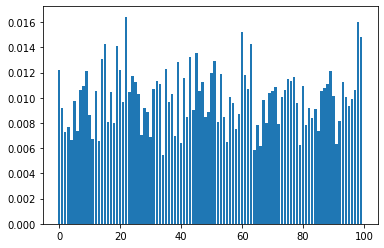

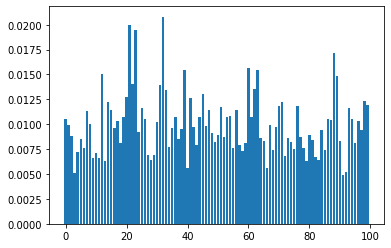

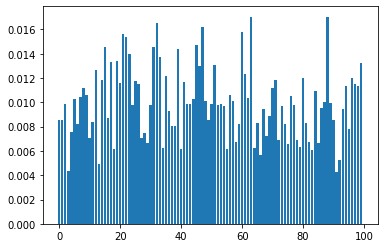

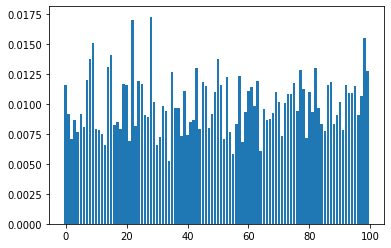

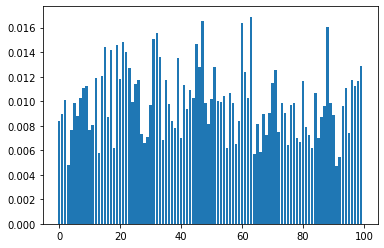

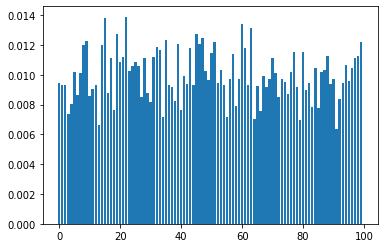

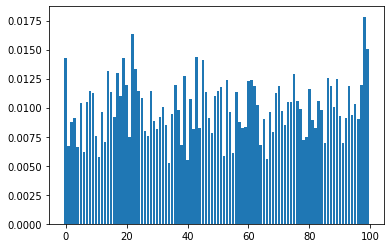

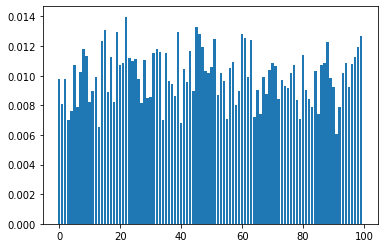

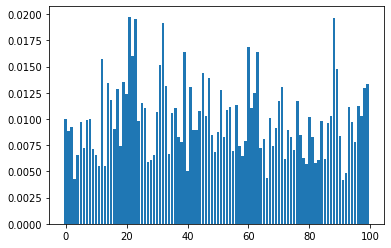

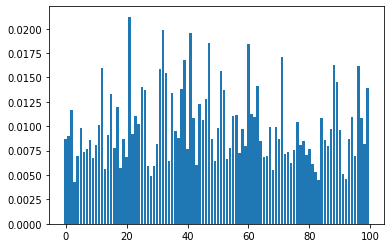

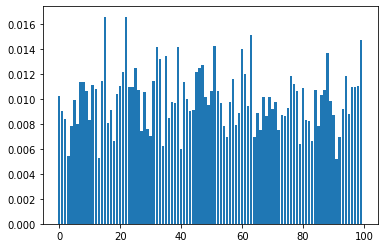

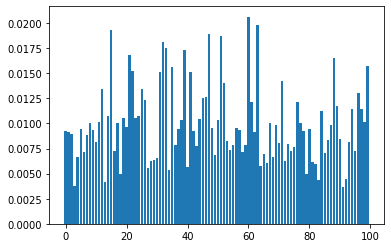

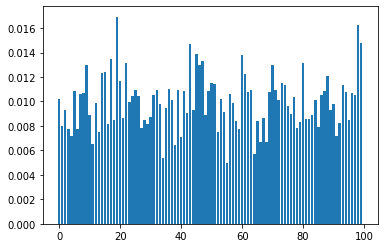

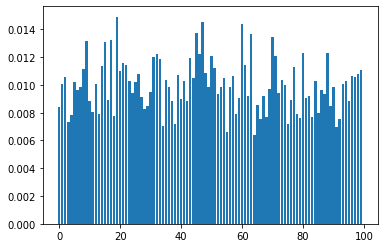

In [37]:
for r in p[torch.randperm(1800)[:20]]:
    plt.bar(range(100), torch.nn.Softmax(dim=0)(r).detach())
    plt.show()